==>>> total trainning batch number: 1250
==>>> total testing batch number: 313
Epoch: 0
Training batch index: 500, train loss: 1.414672, acc: 0.485
Training batch index: 1000, train loss: 0.805031, acc: 0.712
Training batch index: 1250, train loss: 0.669499, acc: 0.761
Validing batch index: 313, train loss: 0.110394, acc: 0.968
Epoch: 1
Training batch index: 500, train loss: 0.101320, acc: 0.969
Training batch index: 1000, train loss: 0.095406, acc: 0.971
Training batch index: 1250, train loss: 0.091950, acc: 0.972
Validing batch index: 313, train loss: 0.076858, acc: 0.976
Epoch: 2
Training batch index: 500, train loss: 0.067899, acc: 0.979
Training batch index: 1000, train loss: 0.066398, acc: 0.979
Training batch index: 1250, train loss: 0.065755, acc: 0.979
Validing batch index: 313, train loss: 0.064270, acc: 0.981
Epoch: 3
Training batch index: 500, train loss: 0.051723, acc: 0.984
Training batch index: 1000, train loss: 0.051333, acc: 0.983
Training batch index: 1250, train loss

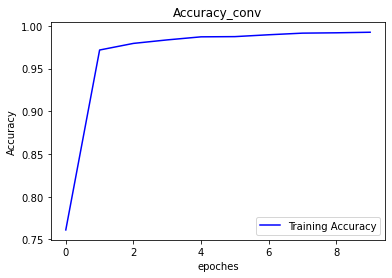

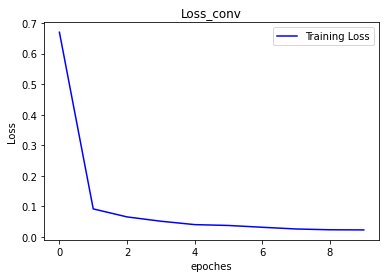

In [1]:
import sys
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torch.optim as optim
import matplotlib.pyplot as plt
from model import ConvNet, MyNet
from data import get_dataloader

import numpy as np
import matplotlib.pyplot as plt

if __name__ == "__main__":
    # Specifiy data folder path and model type(fully/conv)
    #folder, model_type = sys.argv[1], sys.argv[2]
    folder, model_type = "p2", "mynet"
    
    # Get data loaders of training set and validation set
    train_loader, val_loader = get_dataloader(folder, batch_size=32)

    # Specify the type of model
    if model_type == 'conv':
        model = ConvNet()
    elif model_type == 'mynet':
        model = MyNet()

    # Set the type of gradient optimizer and the model it update 
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    # Choose loss function
    criterion = nn.CrossEntropyLoss()

    # Check if GPU is available, otherwise CPU is used
    use_cuda = torch.cuda.is_available()
    if use_cuda:
        model.cuda()

    # Run any number of epochs you want
    ep = 10
    ###
    epoch_num=[]
    train_loss=[]
    train_acc=[]
    ###
    for epoch in range(ep):
        print('Epoch:', epoch)
        ##############
        ## Training ##
        ##############
        epoch_num.append(epoch)
        # Record the information of correct prediction and loss
        correct_cnt, total_loss, total_cnt = 0, 0, 0
        
        
        # Load batch data from dataloader
        acc = 0
        ave_loss = 0
        for batch, (x, label) in enumerate(train_loader,1):
            # Set the gradients to zero (left by previous iteration)
            optimizer.zero_grad()
            # Put input tensor to GPU if it's available
            if use_cuda:
                x, label = x.cuda(), label.cuda()
            # Forward input tensor through your model
            out = model(x)
            # Calculate loss
            loss = criterion(out, label)
            # Compute gradient of each model parameters base on calculated loss
            loss.backward()
            # Update model parameters using optimizer and gradients
            optimizer.step()

            # Calculate the training loss and accuracy of each iteration
            total_loss += loss.item()
            _, pred_label = torch.max(out, 1)
            total_cnt += x.size(0)
            correct_cnt += (pred_label == label).sum().item()
            

            # Show the training information
            if batch % 500 == 0 or batch == len(train_loader):
                acc = correct_cnt / total_cnt
                ave_loss = total_loss / batch           
                print ('Training batch index: {}, train loss: {:.6f}, acc: {:.3f}'.format(
                    batch, ave_loss, acc))
        train_acc.append(acc)
        train_loss.append(ave_loss)
        

        ################
        ## Validation ##
        ################
        model.eval()
        # TODO
        #vaild acc
        with torch.no_grad():
            val_correct_cnt, val_total_loss, val_total_cnt = 0, 0, 0
        # Load batch data from dataloader
            for batch, (x, label) in enumerate(val_loader,1):
                    # Set the gradients to zero (left by previous iteration)
                    #optimizer.zero_grad()
                    # Put input tensor to GPU if it's available
                    if use_cuda:
                        x, label = x.cuda(), label.cuda()
                    # Forward input tensor through your model
                    out = model(x)
                    # Calculate loss
                    loss = criterion(out, label)
                    # Compute gradient of each model parameters base on calculated loss
                    #loss.backward()
                    # Update model parameters using optimizer and gradients
                    #optimizer.step()

                    # Calculate the training loss and accuracy of each iteration
                    val_total_loss += loss.item()
                    _, val_pred_label = torch.max(out, 1)
                    val_total_cnt += x.size(0)
                    val_correct_cnt += (val_pred_label == label).sum().item()
		    

                    # Show the training information
                    if batch % 500 == 0 or batch == len(val_loader):
                        val_acc = val_correct_cnt / val_total_cnt
                        val_ave_loss = val_total_loss / batch           
                        print ('Validing batch index: {}, train loss: {:.6f}, acc: {:.3f}'.format(
                            batch, val_ave_loss, val_acc))

        model.train()
    
            
    # Save trained model
    torch.save(model.state_dict(), './checkpoint/%s.pth' % model.name())

    # Plot Learning Curve
    # TODO
    plt.title('Accuracy_conv')
    plt.plot(epoch_num,train_acc,color='blue',label='Training Accuracy') 
    plt.xlabel('epoches')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    plt.title('Loss_conv')
    plt.plot(epoch_num,train_loss,color='blue',label='Training Loss') 
    plt.xlabel('epoches')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
   

    